# Primeiro Projeto

* **Disciplina**: Inteligência Computacional Aplicada a Saúde
* **Professor**: Andre Georghton Cardoso Pacheco
* **Alunos**: Luiz Carlos Cosmi Filho e Mateus Sobrinho Menines

## Banco de dados

A base de dados utilizada nesse projeto corresponde a um questionário chamado [*Behavioral Risk Fator Surveillance System* (BRFSS)](https://www.cdc.gov/brfss/index.html) de 2015 realizado pelo CDC (*Central Disease Control*) disponível na plataforma [UCI *Machine Learning Repository*](https://archive.ics.uci.edu/) como [CDC *Diabetes Health Indicators*](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). Os atributos presentes na base de dados são:

| Atrbiuto             | Descrição                                                                                                                                                        | Valores                       |
| :---                 |     :---                                                                                                                                                         | :---                          |
| Diabetes_binary      | você tem diabetes?                                                                                                                                               | Sim (1) ou não(0)             |
| HighBP               | você tem pressão alta?                                                                                                                                           | Sim (1) ou não(0)             |
| HighChol             | você tem colesterol alto?                                                                                                                                        | Sim (1) ou não(0)             |
| CholCheck            | você realizou exame de colesterol nos últimos cinco anos?                                                                                                        | Sim (1) ou não(0)             |
| BMI                  | qual seu índice de massa muscular?                                                                                                                               | Número inteiro                |
| Smoker               | você é fumante?                                                                                                                                                  | Sim (1) ou não(0)             |
| Stroke               | você já teve um AVC?                                                                                                                                             | Sim (1) ou não(0)             |
| HeartDiseaseorAttack | você tem doença coronariana (DCC) ou infarto do miocárdio?                                                                                                       | Sim (1) ou não(0)             |
| PhysActivity         | você praticou atividade física nos últimos 30 dias?                                                                                                              | Sim (1) ou não(0)             |
| Fruits               | você consume uma ou mais frutas por dia?                                                                                                                         | Sim (1) ou não(0)             |
| Veggies              | você consume uma ou mais verduras por dia?                                                                                                                       | Sim (1) ou não(0)             |
| HvyAlcoholConsump    | você consume grandes quantidades de álcool (homens adultos que bebem mais de 14 drinques por semana e mulheres adultas que bebem mais de 7 drinques por semana)? | Sim (1) ou não(0)             |
| AnyHealthcare        | você tem algum plano de saúde?                                                                                                                                   | Sim (1) ou não(0)             |
| NoDocbcCost          | houve algum momento nos últimos 12 meses em que você precisou consultar um médico, mas não pôde por causa do custo?                                              | Sim (1) ou não(0)             |
| GenHlth              | você diria que, em geral, o quão boa é a sua saúde?                                                                                                              | Escala de 1 à 5               |
| MentHlth             | sobre sua saúde mental, que inclui estresse, depressão e problemas emocionais, por quantos dias durante os últimos 30 dias sua saúde mental não foi boa?         | Escala de 0 à 30              |
| PhysHlth             | sobre sua saúde física, que inclui doenças e lesões físicas, por quantos dias durante os últimos 30 dias sua saúde física não foi boa?                           | Escala de 0 à 30              |
| DiffWalk             | você tem muita dificuldade para andar ou subir escadas?                                                                                                          | Sim (1) ou não(0)             |
| Sex                  | qual o seu sexo?                                                                                                                                                 | Feminino (0) ou masculino (1) |
| Age                  | qual a sua idade?                                                                                                                                                |Escala de 0 à 14             |
| Education            | qual o seu nível de escolaridade                                                                                                                                 | Escala de 1 à 6               |
| Income               | qual a sua renda familiar anual?                                                                                                                                 | Escala de 1 à 8               |

O objetivo aqui é tentar analisar se podemos identificar se uma pessoa possui ou não diabetes através dos indicadores de saúde presentes na base de dados. Para isso, iremos analisar a base de dados e alguns algoritmos nessa tarefa.

## Importando as bibliotecas

Serão utilizados nesse trabalho os seguintes pacotes:

* [matplotlib](https://matplotlib.org/): biblioteca de software para criação de gráficos e visualizações de dados em geral;
* [numpy](https://numpy.org/): biblioteca de software que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes;
* [seaborn](https://seaborn.pydata.org/): biblioteca de software para no matplotlib. Possui interfaces de alto nível para criação de gráficos pré configurados.
* [pandas](https://pandas.pydata.org/): biblioteca de software criada para manipulação e análise de dados;
* [tabulate](https://github.com/astanin/python-tabulate): biblioteca de software criada para o print de tabelas;
* [sklearn](https://scikit-learn.org/): biblioteca de aprendizado de máquina.

A seguir, importamos diversas funcionalidades dessas bibliotecas apontadas acima.

In [1]:
from typing import Tuple, Literal, Dict, Any, List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tabulate

from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score,
    balanced_accuracy_score,
    recall_score,
    precision_score,
    log_loss,
    precision_recall_curve,
    auc,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from matplotlib.ticker import PercentFormatter

## Funções auxiliares

A seguir, algumas funções foram implementadas a fim facilitar as analíses.

In [2]:
def cross_validate(
    classifier: BaseEstimator,
    X: pd.DataFrame,
    y: pd.DataFrame,
    random_state: int = 42,
    n_folders: int = 5,
) -> None:
    """
    Perform cross-validation on a given classifier using stratified k-folds.

    Parameters
    ----------
    classifier : BaseEstimator
        The classifier to be evaluated.
    X : pd.DataFrame
        The feature data.
    y : pd.DataFrame
        The target labels.
    random_state : int, optional (default=42)
        The random state for reproducibility.
    n_folders : int, optional (default=5)
        The number of folds in the stratified k-fold cross-validation.

    Returns
    -------
    None
        The function prints out the mean, standard deviation, minimum, and maximum
        for accuracy, balanced accuracy, F1 binary score, precision binary score, and recall binary score.
    """
    skf = StratifiedKFold(n_splits=n_folders, shuffle=True, random_state=random_state)
    accuracy, balanced_accuracy, f1_binary, precision_binary, recall_binary = [], [], [], [], []

    for train_index, test_index in skf.split(X, y):
        X_train = X.iloc[train_index, :]
        X_test = X.iloc[test_index, :]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        f1_binary.append(f1_score(y_test, y_pred, average="binary"))
        balanced_accuracy.append(balanced_accuracy_score(y_test, y_pred))
        precision_binary.append(precision_score(y_test, y_pred, average="binary"))
        recall_binary.append(recall_score(y_test, y_pred, average="binary"))

    dados = [
        ["Metric", "Mean", "Standard deviation", "Minimum", "Maximum"],
        ["Accuracy", np.mean(accuracy), np.std(accuracy), np.min(accuracy), np.max(accuracy)],
        ["Balanced accuracy", np.mean(balanced_accuracy), np.std(balanced_accuracy), np.min(balanced_accuracy), np.max(balanced_accuracy)],
        ["F1 binary",  np.mean(f1_binary), np.std(f1_binary), np.min(f1_binary), np.max(f1_binary)],
        ["Precision binary",  np.mean(precision_binary), np.std(precision_binary), np.min(precision_binary), np.max(precision_binary)],
        ["Recall binary",  np.mean(recall_binary), np.std(recall_binary), np.min(recall_binary), np.max(recall_binary)],
    ]
    table = tabulate.tabulate(dados, headers="firstrow", tablefmt="grid")
    print(table)


def find_best_params(
    model: BaseEstimator,
    X: pd.core.frame.DataFrame,
    Y: pd.core.frame.DataFrame, 
    params: Dict[str, List[Any]],
    folds: int = 5,
    metric: str = "f1",
) -> Dict[str, Any]:
    """
    Perform grid search to find the best hyperparameters for a given model.

    Parameters
    ----------
    model : BaseEstimator
        The machine learning model for which to find the best hyperparameters.
    X : pd.core.frame.DataFrame
        The feature data.
    Y : pd.core.frame.DataFrame
        The target labels.
    params : Dict[str, List[Any]]
        The hyperparameter grid to search over. Keys are parameter names and values are lists of parameter settings to try.
    folds : int, optional (default=5)
        The number of folds in the stratified k-fold cross-validation.
    metric : str, optional (default="f1")
        The scoring metric to evaluate the model performance.

    Returns
    -------
    Dict[str, Any]
        The best hyperparameters found by the grid search.
    """
    kfolds = StratifiedKFold(folds)
    gsc = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring=metric,
        cv=kfolds.split(X, Y),
    )
    grid_result = gsc.fit(X, Y)
    return grid_result.best_params_

## Carregando e tratando a base de dados

Então, carregamos a base de dados e todos os atributos como números inteiros.

In [3]:
df = pd.read_csv(
    filepath_or_buffer="../data/diabetes_binary_health_indicators_BRFSS2015.csv",
    dtype={
        'Diabetes_binary': np.int32,
        'HighBP': np.int32,
        'HighChol': np.int32,
        'CholCheck': np.int32,
        'BMI': np.int32,
        'Smoker': np.int32,
        'Stroke': np.int32,
        'HeartDiseaseorAttack': np.int32,
        'PhysActivity': np.int32,
        'Fruits': np.int32,
        'Veggies': np.int32,
        'HvyAlcoholConsump': np.int32,
        'AnyHealthcare': np.int32,
        'NoDocbcCost': np.int32,
        'GenHlth': np.int32,
        'MentHlth': np.int32,
        'PhysHlth': np.int32,
        'DiffWalk': np.int32,
        'Sex': np.int32,
        'Age': np.int32,
        'Education': np.int32,
        'Income': np.int32,
    },
)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [4]:
print("Quantidade de linhas duplicadas:")
print(df.duplicated().sum())

print("Tamanho do banco de dados:")
print(df.shape[0])

Quantidade de linhas duplicadas:
24206
Tamanho do banco de dados:
253680


In [5]:
df.drop_duplicates(inplace = True)

print("Quantidade de linhas duplicadas:")
print(df.duplicated().sum())

print("Tamanho do banco de dados:")
print(df.shape[0])

Quantidade de linhas duplicadas:
0
Tamanho do banco de dados:
229474


In [6]:
print("Verificando se há Nan")
df.isnull().sum()

Verificando se há Nan


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

print(Y.value_counts())

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    shuffle=True,
    random_state=42,
    stratify=Y,
)
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 160631
Tamanho do conjunto de teste: 68843


## Alguns gráficos

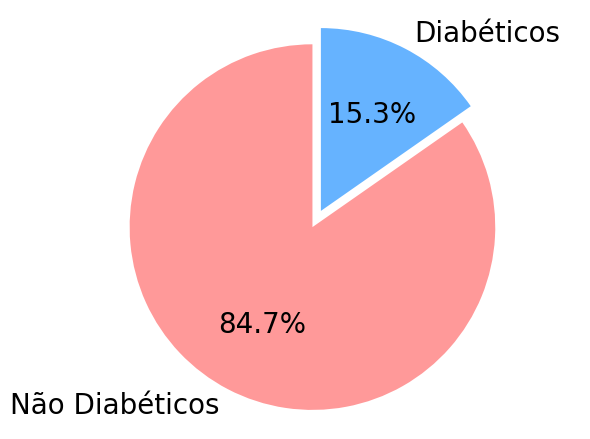

In [9]:
matplotlib.rcParams.update({'font.size': 20})
labels = ['Não Diabéticos', 'Diabéticos']
sizes = Y.value_counts().values
explode = (0, 0.1)
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
)
ax1.axis('equal')
plt.tight_layout()
plt.savefig("../results/distribution_diabetes.png")
plt.show()

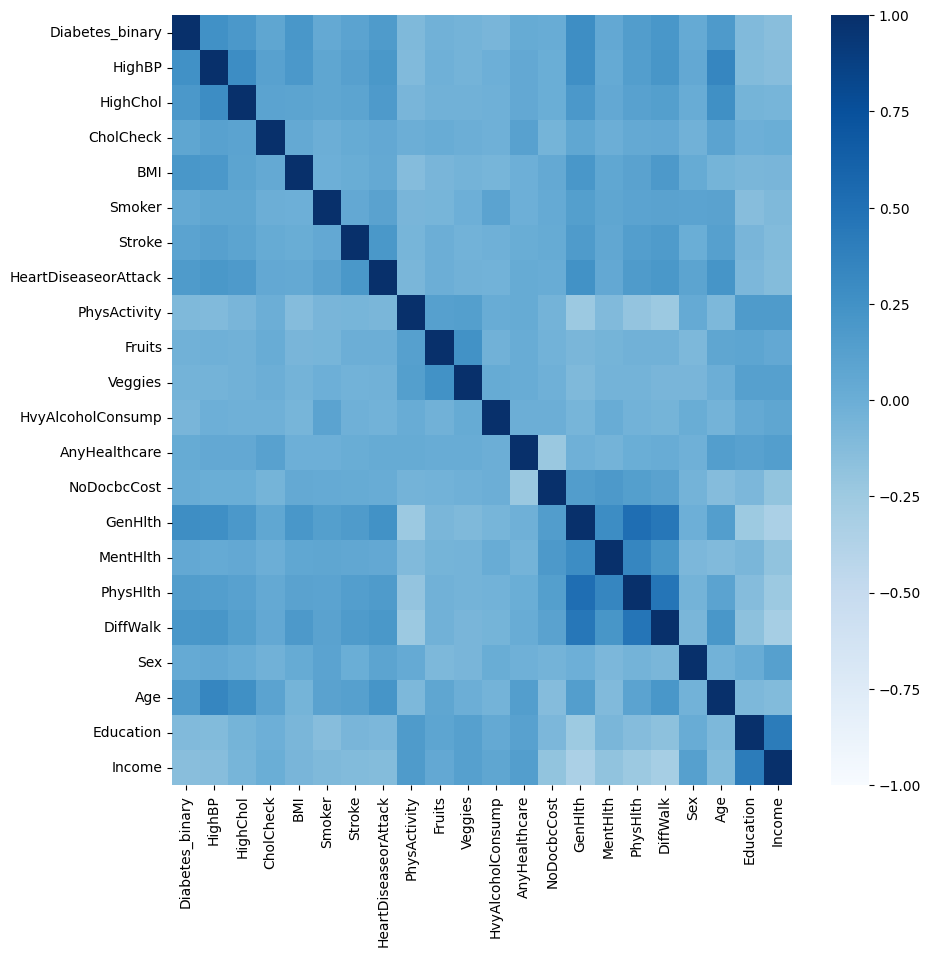

In [61]:
matplotlib.rcParams.update({'font.size': 10})

corr = df.corr()
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr,
    annot=False,
    cmap='Blues',
    cbar=True,
    vmin=-1,
    vmax=1,
)
plt.savefig('../results/correlation.png',  dpi=300, bbox_inches = "tight")
plt.show()

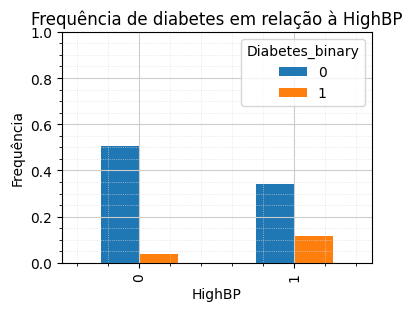

In [62]:
relation = pd.crosstab(df["HighBP"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar",figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à HighBP')
ax.set_xlabel("HighBP")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

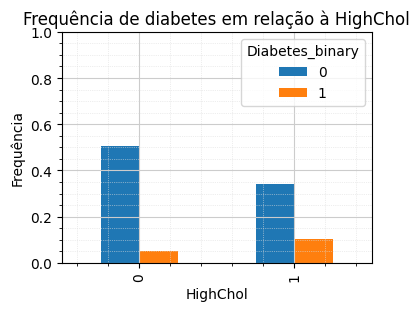

In [63]:
relation = pd.crosstab(df["HighChol"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar",figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à HighChol')
ax.set_xlabel("HighChol")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

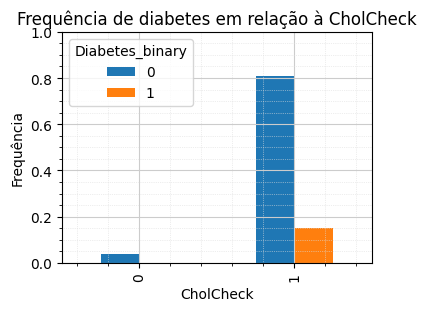

In [64]:
relation = pd.crosstab(df["CholCheck"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à CholCheck')
ax.set_xlabel("CholCheck")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

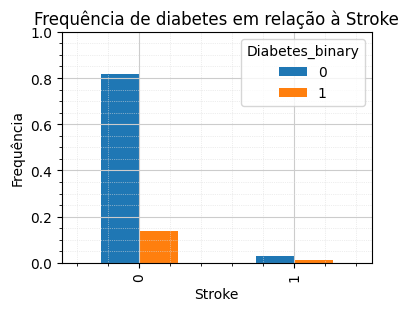

In [65]:
relation = pd.crosstab(df["Stroke"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à Stroke')
ax.set_xlabel("Stroke")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

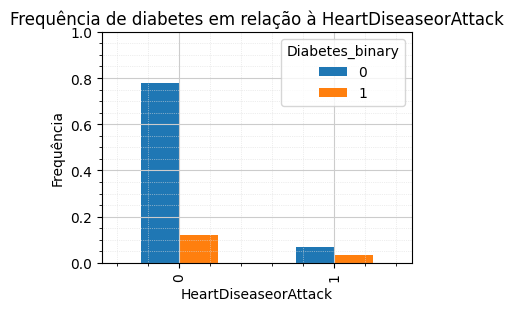

In [66]:
relation = pd.crosstab(df["HeartDiseaseorAttack"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à HeartDiseaseorAttack')
ax.set_xlabel("HeartDiseaseorAttack")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

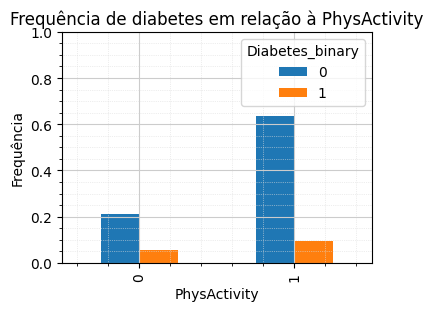

In [67]:
relation = pd.crosstab(df["PhysActivity"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à PhysActivity')
ax.set_xlabel("PhysActivity")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

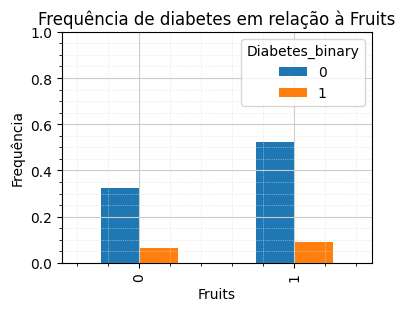

In [68]:
relation = pd.crosstab(df["Fruits"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à Fruits')
ax.set_xlabel("Fruits")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

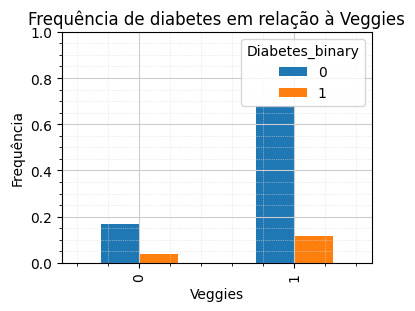

In [69]:
relation = pd.crosstab(df["Veggies"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à Veggies')
ax.set_xlabel("Veggies")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

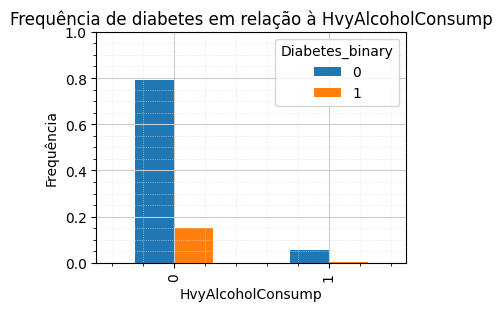

In [70]:
relation = pd.crosstab(df["HvyAlcoholConsump"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à HvyAlcoholConsump')
ax.set_xlabel("HvyAlcoholConsump")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

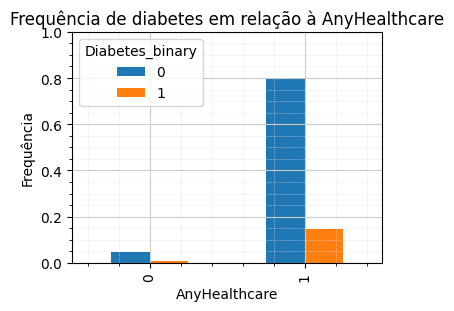

In [71]:
relation = pd.crosstab(df["AnyHealthcare"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à AnyHealthcare')
ax.set_xlabel("AnyHealthcare")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

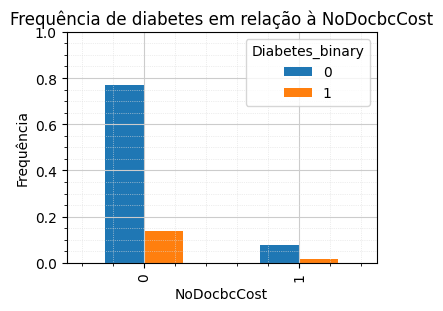

In [72]:
relation = pd.crosstab(df["NoDocbcCost"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à NoDocbcCost')
ax.set_xlabel("NoDocbcCost")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

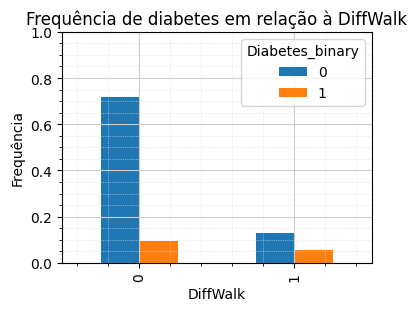

In [73]:
relation = pd.crosstab(df["DiffWalk"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à DiffWalk')
ax.set_xlabel("DiffWalk")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

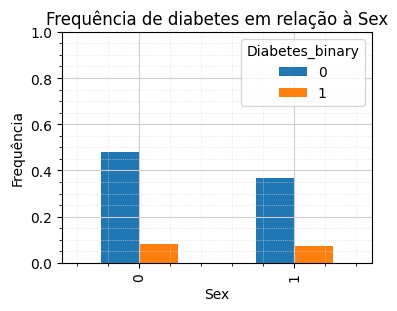

In [74]:
relation = pd.crosstab(df["Sex"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(4, 3))
ax.set_title('Frequência de diabetes em relação à Sex')
ax.set_xlabel("Sex")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

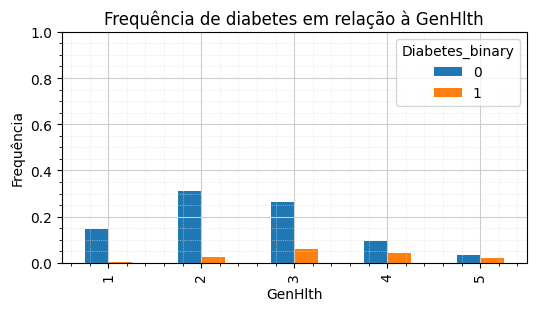

In [75]:
relation = pd.crosstab(df["GenHlth"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(6, 3))
ax.set_title('Frequência de diabetes em relação à GenHlth')
ax.set_xlabel("GenHlth")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 1)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

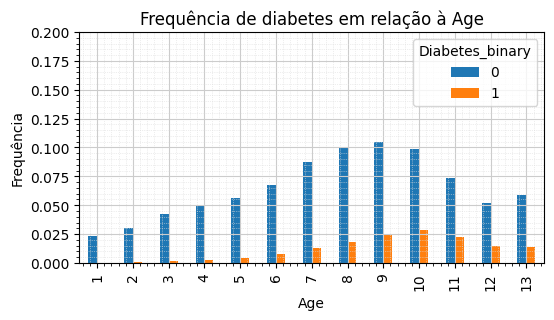

In [76]:
relation = pd.crosstab(df["Age"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(6, 3))
ax.set_title('Frequência de diabetes em relação à Age')
ax.set_xlabel("Age")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 0.2)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

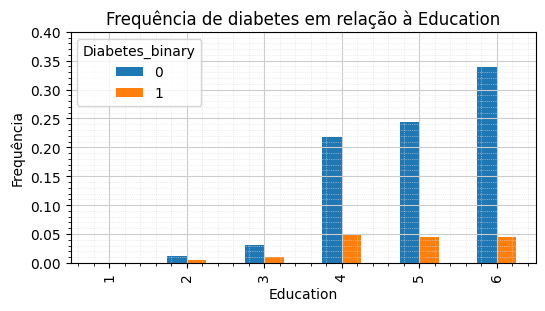

In [77]:
relation = pd.crosstab(df["Education"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(6, 3))
ax.set_title('Frequência de diabetes em relação à Education')
ax.set_xlabel("Education")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 0.4)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

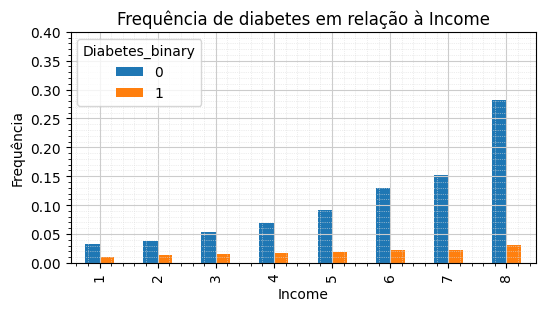

In [78]:
relation = pd.crosstab(df["Income"], df["Diabetes_binary"], normalize=True)
ax = relation.plot(kind="bar", figsize=(6, 3))
ax.set_title('Frequência de diabetes em relação à Income')
ax.set_xlabel("Income")
ax.set_ylabel('Frequência')
ax.set_ylim(0, 0.4)
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

/tmp/ipykernel_2936/4003766583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['BMI'] = df_diabetes['BMI'].apply(lambda x: 0 if x < 24 else (1 if x == 24 else 2))
/tmp/ipykernel_2936/4003766583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_diabetes['BMI'] = df_non_diabetes['BMI'].apply(lambda x: 0 if x < 24 else (1 if x == 24 else 2))


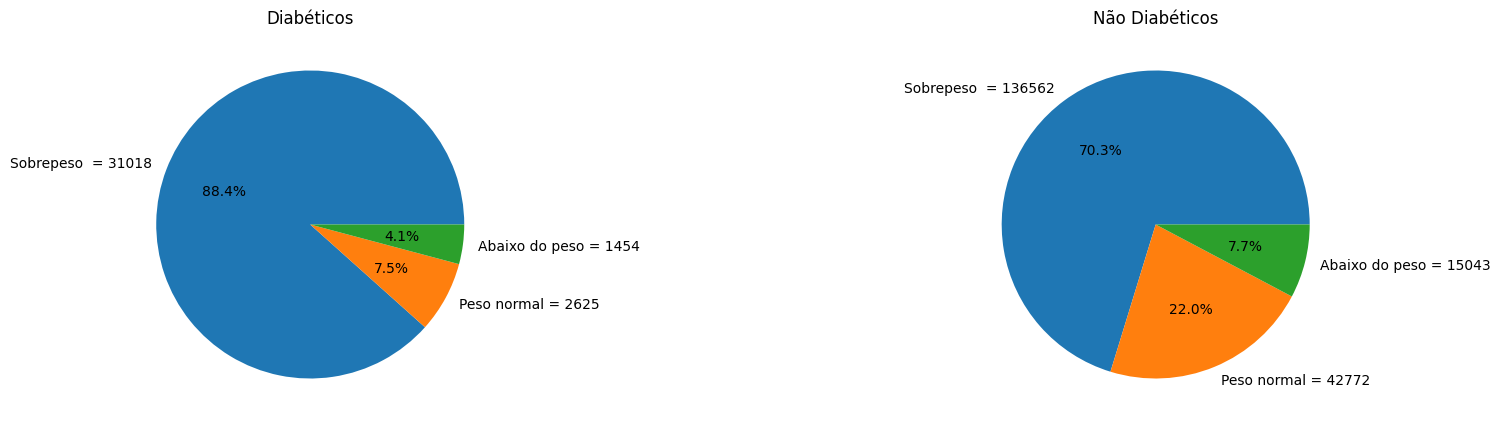

In [79]:
df_diabetes = df[df["Diabetes_binary"]==1]
df_diabetes['BMI'] = df_diabetes['BMI'].apply(lambda x: 0 if x < 24 else (1 if x == 24 else 2))
count_BMI = df_diabetes['BMI'].value_counts()

df_non_diabetes = df[df["Diabetes_binary"]==0]
df_non_diabetes['BMI'] = df_non_diabetes['BMI'].apply(lambda x: 0 if x < 24 else (1 if x == 24 else 2))
count_BMI_non = df_non_diabetes['BMI'].value_counts()

fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.pie(count_BMI , labels = [f"Sobrepeso  = {count_BMI[2]}",f"Peso normal = {count_BMI[0]}",f"Abaixo do peso = {count_BMI[1]}"] ,autopct='%1.1f%%' )
ax1.set_title("Diabéticos")

ax2 = fig.add_subplot(1, 2, 2)
ax2.pie(count_BMI_non, labels = [f"Sobrepeso  = {count_BMI_non[2]}",f"Peso normal = {count_BMI_non[0]}",f"Abaixo do peso = {count_BMI_non[1]}"] ,autopct='%1.1f%%' )
ax2.set_title("Não Diabéticos")

plt.show()

## Não considerando o desbalanceamento entre as classes

A seguir, algumas técnicas de aprendizado de máquina serão utilizadas. Entretanto, sem considerar o deslabalanceamento em 

### Regressão Logística

Um simples 

In [ ]:
lr_classifier = make_pipeline(
  StandardScaler(),
  SGDClassifier(
      loss="log_loss",
      max_iter=1000,
      random_state=42,
      class_weight=None,
      early_stopping=True,
  ),
)
lr_classifier

In [10]:
cross_validate(lr_classifier, X, Y, n_folders=10, random_state=42)

+-------------------+----------+----------------------+-----------+-----------+
| Metric            |     Mean |   Standard deviation |   Minimum |   Maximum |
+===================+==========+======================+===========+===========+
| Accuracy          | 0.848824 |           0.00229531 | 0.844424  |  0.852138 |
+-------------------+----------+----------------------+-----------+-----------+
| Balanced accuracy | 0.564026 |           0.0190004  | 0.542186  |  0.610047 |
+-------------------+----------+----------------------+-----------+-----------+
| F1 binary         | 0.23285  |           0.0511257  | 0.167031  |  0.348778 |
+-------------------+----------+----------------------+-----------+-----------+
| Precision binary  | 0.529273 |           0.0289932  | 0.483937  |  0.572671 |
+-------------------+----------+----------------------+-----------+-----------+
| Recall binary     | 0.153718 |           0.0492959  | 0.0980057 |  0.272365 |
+-------------------+----------+--------

In [11]:
lr_classifier.fit(X_train, y_train)

print(f"Acurácia de treinamento: {lr_classifier.score(X_train, y_train)}")
print(f"Acurácia de teste: {lr_classifier.score(X_test, y_test)}")

Acurácia de treinamento: 0.8483978808573688
Acurácia de teste: 0.8493674011882109


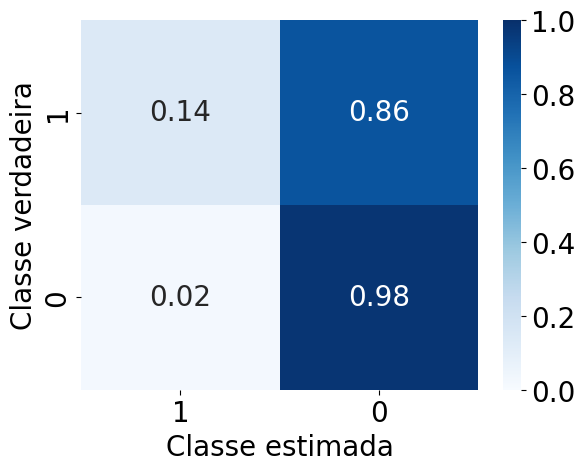

In [12]:
y_pred_lr = lr_classifier.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr, normalize="true",  labels=[1, 0])

ax = sns.heatmap(
    cm_lr,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_lr.png', dpi=300, bbox_inches = "tight")
plt.show()

In [13]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_lr)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_lr)}")
print(f"F1 -> {f1_score(y_test, y_pred_lr)}")
print(f"Precisao -> {precision_score(y_test, y_pred_lr)}")
print(f"Recall -> {recall_score(y_test, y_pred_lr)}")

Teste:
Acurácia -> 0.8493674011882109
Acurácia balanceada -> 0.557904799217723
F1 -> 0.2188912322988852
Precisao -> 0.5289406625409537
Recall -> 0.13799981004843764


Apesar da alta acurácia de 85%, obteve-se um baixo recall. Ao analisar a tabela de confusão, fica claro o porquê isso aconteceu. O algoritmo ficou tendencioso a própria distribuição dos dados na base de dados.

### Linear SVM

Nesse trabalho, utilizou-se o algoritmo de gradiente descendente estocástico associado com a função de perda de articulação.

In [14]:
svm_classifier = make_pipeline(
  StandardScaler(),
  SGDClassifier(
      loss="hinge",
      max_iter=1000,
      random_state=42,
      class_weight=None,
      early_stopping=True,
  ),
)
svm_classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(early_stopping=True, random_state=42))])

In [15]:
cross_validate(svm_classifier, X, Y, n_folders=10, random_state=42)

/home/luizcarloscf/Documents/Mestrado/disciplinas/inteligencia-computacional-em-saude/2024-1-P1-classificador-diabetes/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luizcarloscf/Documents/Mestrado/disciplinas/inteligencia-computacional-em-saude/2024-1-P1-classificador-diabetes/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luizcarloscf/Documents/Mestrado/disciplinas/inteligencia-computacional-em-saude/2024-1-P1-classificador-diabetes/.venv/lib/python3.10/site-packages/

+-------------------+-----------+----------------------+-----------+-----------+
| Metric            |      Mean |   Standard deviation |   Minimum |   Maximum |
+===================+===========+======================+===========+===========+
| Accuracy          | 0.84695   |          0.000349211 |  0.845906 |  0.847133 |
+-------------------+-----------+----------------------+-----------+-----------+
| Balanced accuracy | 0.505063  |          0.0147858   |  0.5      |  0.549407 |
+-------------------+-----------+----------------------+-----------+-----------+
| F1 binary         | 0.0200935 |          0.0584154   |  0        |  0.195266 |
+-------------------+-----------+----------------------+-----------+-----------+
| Precision binary  | 0.104085  |          0.208762    |  0        |  0.555556 |
+-------------------+-----------+----------------------+-----------+-----------+
| Recall binary     | 0.0125071 |          0.0365816   |  0        |  0.122222 |
+-------------------+-------

/home/luizcarloscf/Documents/Mestrado/disciplinas/inteligencia-computacional-em-saude/2024-1-P1-classificador-diabetes/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
svm_classifier.fit(X_train, y_train)
print(f"Acurácia de treinamento: {svm_classifier.score(X_train, y_train)}")
print(f"Acurácia de teste: {svm_classifier.score(X_test, y_test)}")

Acurácia de treinamento: 0.8471527911797847
Acurácia de teste: 0.847057798178464


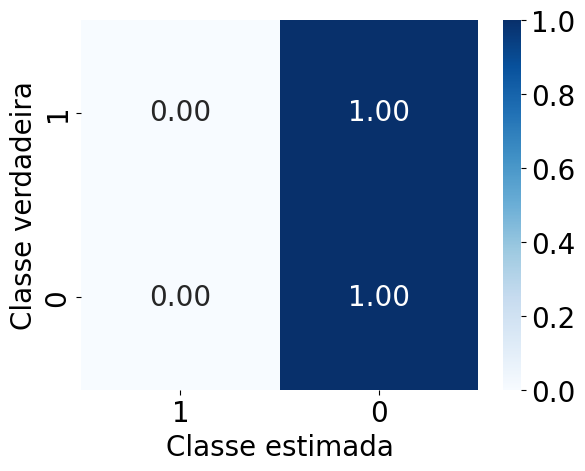

In [17]:
y_pred_svm = svm_classifier.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm, normalize="true", labels=[1, 0])

ax = sns.heatmap(
    cm_svm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_svm.png', dpi=300, bbox_inches = "tight")
plt.show()

In [18]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_svm)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_svm)}")
print(f"F1 -> {f1_score(y_test, y_pred_svm)}")
print(f"Precisao -> {precision_score(y_test, y_pred_svm)}")
print(f"Recall -> {recall_score(y_test, y_pred_svm)}")

Teste:
Acurácia -> 0.847057798178464
Acurácia balanceada -> 0.5005447906836162
F1 -> 0.0026522686369233684
Precisao -> 0.5
Recall -> 0.0013296609364612023


Apesar da alta acurácia de 85%, obteve-se um recall ainda mais baixo que o método anterior. Ao analisar a tabela de confusão, fica claro o porquê isso aconteceu. O algoritmo ficou complementa tendencioso a própria distribuição dos dados na base de dados, classificando todas as amostras como pertencentes a classe de "Não diabéticos".

### Random Forest

In [19]:
rf_classifier = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=42,
        max_depth=6,
        class_weight=None,
    ),
)
rf_classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, random_state=42))])

In [20]:
cross_validate(rf_classifier, X, Y, n_folders=10, random_state=42)

+-------------------+-----------+----------------------+-----------+-----------+
| Metric            |      Mean |   Standard deviation |   Minimum |   Maximum |
+===================+===========+======================+===========+===========+
| Accuracy          | 0.848972  |          0.000282408 | 0.848484  | 0.849355  |
+-------------------+-----------+----------------------+-----------+-----------+
| Balanced accuracy | 0.512094  |          0.00118409  | 0.510187  | 0.513685  |
+-------------------+-----------+----------------------+-----------+-----------+
| F1 binary         | 0.0513744 |          0.00521453  | 0.0431774 | 0.0585683 |
+-------------------+-----------+----------------------+-----------+-----------+
| Precision binary  | 0.657762  |          0.041351    | 0.603352  | 0.757282  |
+-------------------+-----------+----------------------+-----------+-----------+
| Recall binary     | 0.0267544 |          0.00285641  | 0.0222222 | 0.030778  |
+-------------------+-------

In [21]:
rf_classifier.fit(X_train, y_train)
print(f"Acurácia de treinamento: {rf_classifier.score(X_train, y_train)}")
print(f"Acurácia de teste: {rf_classifier.score(X_test, y_test)}")

Acurácia de treinamento: 0.8491075819735916
Acurácia de teste: 0.8494255044085819


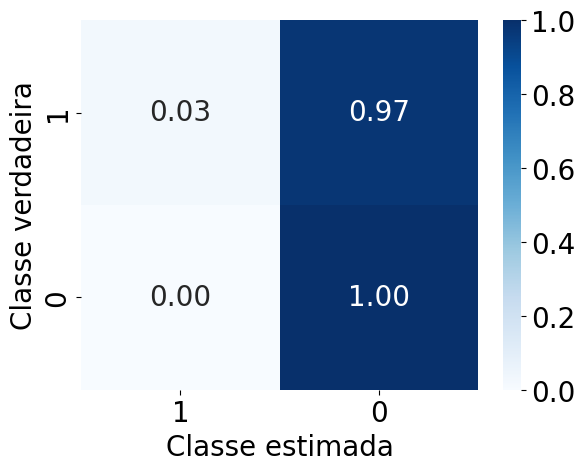

In [22]:
y_pred_rf = rf_classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, normalize="true", labels=[1, 0])

ax = sns.heatmap(
    cm_rf,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_rf.png', dpi=300, bbox_inches = "tight")
plt.show()

In [23]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_rf)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_rf)}")
print(f"F1 -> {f1_score(y_test, y_pred_rf)}")
print(f"Precisao -> {precision_score(y_test, y_pred_rf)}")
print(f"Recall -> {recall_score(y_test, y_pred_rf)}")

Teste:
Acurácia -> 0.8494255044085819
Acurácia balanceada -> 0.5125269014575993
F1 -> 0.0522947522398976
Precisao -> 0.6992665036674817
Recall -> 0.027163073416278848


Apesar da alta acurácia de 85%, também obteve-se um recall muito baixo. O algoritmo ficou complementamente tendencioso a própria distribuição dos dados na base de dados, classificando quase todas as amostras como pertencentes a classe de "Não diabéticos".

## Considerando o desbalanceamento entre as classes (aprendizado sensível ao custo)

Pelas análises anteriores, ficou claro a necessidade de considerar o desbalanceamento entre as classes para se obter um algoritmo que possa ser utilizado por alguma aplicação (por exemplo, servir como um indicador de risco a desenvolver diabetes de acordo com os indicadores de saúde). 


### Regressão Logística (frequência das classes)

In [45]:
params = {
    "sgdclassifier__penalty": ["l1", "l2", "elasticnet"],
    "sgdclassifier__max_iter": [1000, 2000],
}
lr_classifier_search = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss="log_loss",
        random_state=42,
        early_stopping=True,
        class_weight="balanced",
    ),
)
best_params_lr_search = find_best_params(
    model=lr_classifier_search,
    X=X,
    Y=Y,
    params=params,
    folds=5,
    metric="f1",
)
best_params_lr_search

{'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'elasticnet'}

In [46]:
lr_classifier_final = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss="log_loss",
        random_state=42,
        max_iter=best_params_lr_search["sgdclassifier__max_iter"],
        penalty=best_params_lr_search["sgdclassifier__penalty"],
        class_weight="balanced",
        early_stopping=True,
    ),
)
lr_classifier_final

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', early_stopping=True,
                               loss='log_loss', penalty='elasticnet',
                               random_state=42))])

In [47]:
cross_validate(lr_classifier_final, X, Y, n_folders=10, random_state=42)

+-------------------+----------+----------------------+-----------+-----------+
| Metric            |     Mean |   Standard deviation |   Minimum |   Maximum |
+===================+==========+======================+===========+===========+
| Accuracy          | 0.71137  |           0.0205421  |  0.67117  |  0.738757 |
+-------------------+----------+----------------------+-----------+-----------+
| Balanced accuracy | 0.729991 |           0.00390656 |  0.72282  |  0.735484 |
+-------------------+----------+----------------------+-----------+-----------+
| F1 binary         | 0.445591 |           0.0100056  |  0.42764  |  0.461124 |
+-------------------+----------+----------------------+-----------+-----------+
| Precision binary  | 0.316267 |           0.013776   |  0.2914   |  0.336835 |
+-------------------+----------+----------------------+-----------+-----------+
| Recall binary     | 0.756818 |           0.0249299  |  0.720513 |  0.803134 |
+-------------------+----------+--------

In [48]:
lr_classifier_final.fit(X_train, y_train)
print(f"Acurácia de treinamento: {lr_classifier_final.score(X_train, y_train)}")
print(f"Acurácia de teste: {lr_classifier_final.score(X_test, y_test)}")

Acurácia de treinamento: 0.6742471876536907
Acurácia de teste: 0.6741280885493078


[[ 8553  1976]
 [20458 37856]]


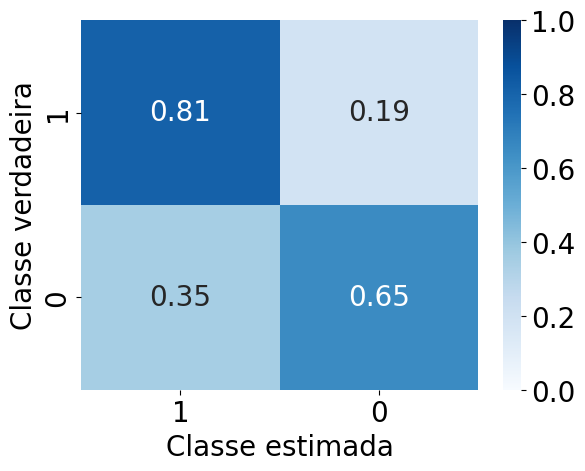

In [49]:
y_pred_lr_final = lr_classifier_final.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr_final, labels=[1, 0]))

cm_lr_final = confusion_matrix(y_test, y_pred_lr_final, normalize="true", labels=[1, 0])

ax = sns.heatmap(
    cm_lr_final,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_lr_final.png',  dpi=300, bbox_inches = "tight")
plt.show()

In [50]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_lr_final)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_lr_final)}")
print(f"F1 -> {f1_score(y_test, y_pred_lr_final)}")
print(f"Precisao -> {precision_score(y_test, y_pred_lr_final)}")
print(f"Recall -> {recall_score(y_test, y_pred_lr_final)}")

Teste:
Acurácia -> 0.6741280885493078
Acurácia balanceada -> 0.7307515057954559
F1 -> 0.43262518968133534
Precisao -> 0.2948192065078763
Recall -> 0.8123278563966189


### Linear SVM (frequência das classes)

In [30]:
params = {
    "sgdclassifier__penalty": ["l1", "l2", "elasticnet"],
    "sgdclassifier__max_iter": [1000],
}
svm_classifier_search = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss="hinge",
        random_state=42,
        early_stopping=True,
    ),
)
best_params_svm_search = find_best_params(
    model=svm_classifier_search,
    X=X,
    Y=Y,
    params=params,
    folds=5,
    metric="f1",
)
best_params_svm_search

{'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l2'}

In [31]:
svm_classifier_final = make_pipeline(
    StandardScaler(),
    SGDClassifier(
        loss="hinge",
        random_state=42,
        max_iter=best_params_svm_search["sgdclassifier__max_iter"],
        penalty=best_params_svm_search["sgdclassifier__penalty"],
        class_weight="balanced",
        early_stopping=True,
    ),
)
svm_classifier_final

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', early_stopping=True,
                               random_state=42))])

In [32]:
cross_validate(svm_classifier_final, X, Y, n_folders=10, random_state=42)

+-------------------+----------+----------------------+-----------+-----------+
| Metric            |     Mean |   Standard deviation |   Minimum |   Maximum |
+===================+==========+======================+===========+===========+
| Accuracy          | 0.691904 |           0.0233609  |  0.642611 |  0.730521 |
+-------------------+----------+----------------------+-----------+-----------+
| Balanced accuracy | 0.722471 |           0.00483049 |  0.71436  |  0.731829 |
+-------------------+----------+----------------------+-----------+-----------+
| F1 binary         | 0.432604 |           0.00853681 |  0.412914 |  0.443785 |
+-------------------+----------+----------------------+-----------+-----------+
| Precision binary  | 0.301968 |           0.0127344  |  0.275717 |  0.324264 |
+-------------------+----------+----------------------+-----------+-----------+
| Recall binary     | 0.766507 |           0.0350035  |  0.702849 |  0.821887 |
+-------------------+----------+--------

In [33]:
svm_classifier_final.fit(X_train, y_train)
print(f"Acurácia de treinamento: {svm_classifier_final.score(X_train, y_train)}")
print(f"Acurácia de teste: {svm_classifier_final.score(X_test, y_test)}")

Acurácia de treinamento: 0.6893376745460091
Acurácia de teste: 0.6869979518614819


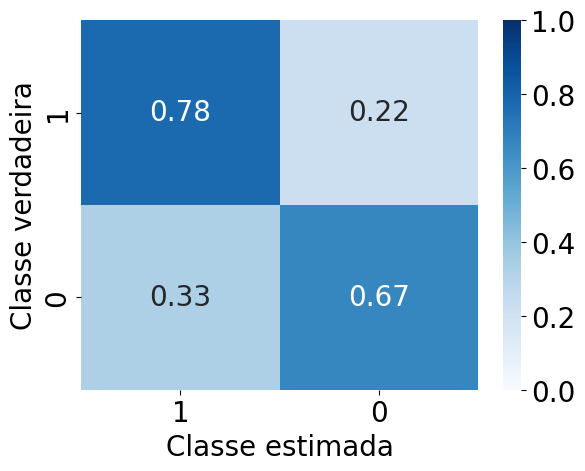

In [34]:
y_pred_svm_final = svm_classifier_final.predict(X_test)
cm_svm_final = confusion_matrix(y_test, y_pred_svm_final, normalize="true", labels=[1, 0])

ax = sns.heatmap(
    cm_svm_final,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_svm_final.png',  dpi=300, bbox_inches = "tight")
plt.show()

In [35]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_svm_final)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_svm_final)}")
print(f"F1 -> {f1_score(y_test, y_pred_svm_final)}")
print(f"Precisao -> {precision_score(y_test, y_pred_svm_final)}")
print(f"Recall -> {recall_score(y_test, y_pred_svm_final)}")

Teste:
Acurácia -> 0.6869979518614819
Acurácia balanceada -> 0.7245728877360371
F1 -> 0.4321404100563959
Precisao -> 0.2990480358901412
Recall -> 0.7787064298603856


### RandomForest (frequência das classes)

In [36]:
params = {
    "randomforestclassifier__max_depth": [4, 5, 6, 7],
    "randomforestclassifier__n_estimators": [25, 50, 100],
    "randomforestclassifier__criterion": ["gini", "entropy"],
}
rf_classifier_search = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample",
    ),
)
best_params_rf_search = find_best_params(
    model=rf_classifier_search,
    X=X,
    Y=Y,
    params=params,
    folds=5,
    metric="f1",
)
best_params_rf_search

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__n_estimators': 50}

In [37]:
rf_classifier_final = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        random_state=42,
        class_weight="balanced_subsample",
        max_depth=best_params_rf_search["randomforestclassifier__max_depth"],
        n_estimators=best_params_rf_search["randomforestclassifier__n_estimators"],
        criterion=best_params_rf_search["randomforestclassifier__criterion"],
    ),
)
rf_classifier_final

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        criterion='entropy', max_depth=7,
                                        n_estimators=50, random_state=42))])

In [38]:
rf_classifier_final.fit(X_train, y_train)
print(f"Acurácia de treinamento: {rf_classifier_final.score(X_train, y_train)}")
print(f"Acurácia de teste: {rf_classifier_final.score(X_test, y_test)}")

Acurácia de treinamento: 0.7119236012973834
Acurácia de teste: 0.710326394840434


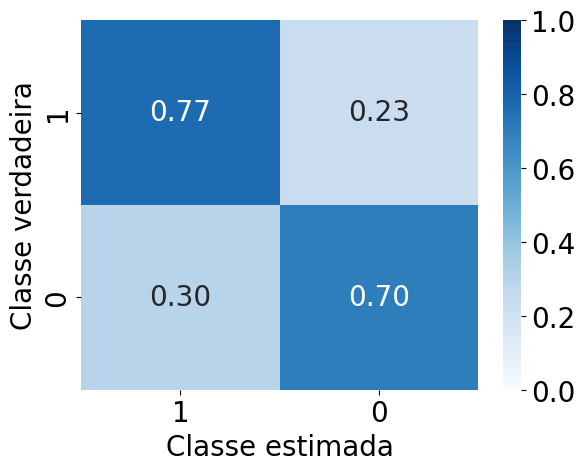

In [39]:
y_pred_rf_final = rf_classifier_final.predict(X_test)
cm_rf_final = confusion_matrix(y_test, y_pred_rf_final, normalize="true", labels=[1, 0])

ax = sns.heatmap(
    cm_rf_final,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    cbar=True,
    vmin=0,
    vmax=1,
)
ax.set_ylabel('Classe verdadeira')
ax.set_xlabel('Classe estimada')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.savefig('../results/cm_rf_final.png',  dpi=300, bbox_inches = "tight")
plt.show()

In [40]:
print("Teste:")
print(f"Acurácia -> {accuracy_score(y_test, y_pred_rf_final)}")
print(f"Acurácia balanceada -> {balanced_accuracy_score(y_test, y_pred_rf_final)}")
print(f"F1 -> {f1_score(y_test, y_pred_rf_final)}")
print(f"Precisao -> {precision_score(y_test, y_pred_rf_final)}")
print(f"Recall -> {recall_score(y_test, y_pred_rf_final)}")

Teste:
Acurácia -> 0.710326394840434
Acurácia balanceada -> 0.7343350629987611
F1 -> 0.4481098134720762
Precisao -> 0.3161882444834993
Recall -> 0.7689239243992781


## Curva Precision x Recall dos melhores classficadores

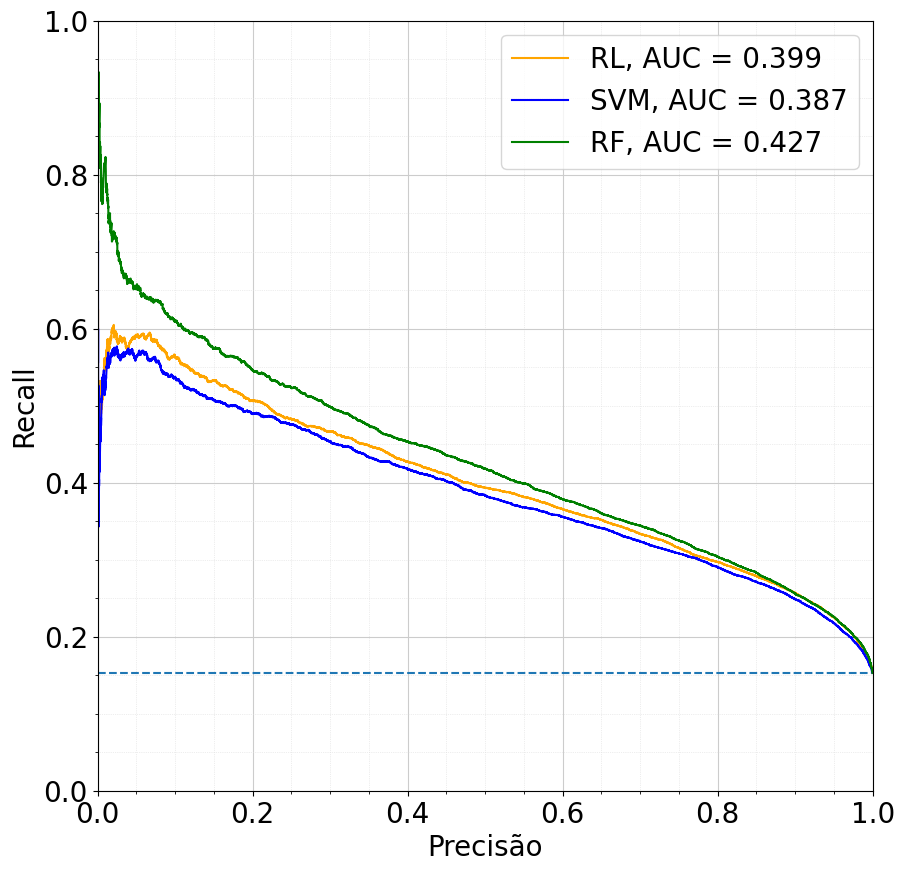

In [41]:
no_skill = len(y_test[y_test==1]) / len(y_test)

svm_probs = svm_classifier_final.decision_function(X_test)
rf_probs = rf_classifier_final.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

lr_probs = lr_classifier_final.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

lr_auc_score = auc(lr_recall, lr_precision)
svm_auc_score = auc(svm_recall, svm_precision)
rf_auc_score = auc(rf_recall, rf_precision)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(lr_recall, lr_precision, color="orange", label=f'RL, AUC = {round(lr_auc_score, 3)}')
plt.plot(svm_recall, svm_precision, color="blue", label=f'SVM, AUC = {round(svm_auc_score,3)}')
plt.plot(rf_recall, rf_precision, color="green", label=f'RF, AUC = {round(rf_auc_score ,3)}')
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.xlabel('Precisão')
plt.ylabel('Recall')
plt.legend()
plt.savefig("../results/precision_recall_balanced.png")
plt.show()

## Curva ROC dos melhores classificadores

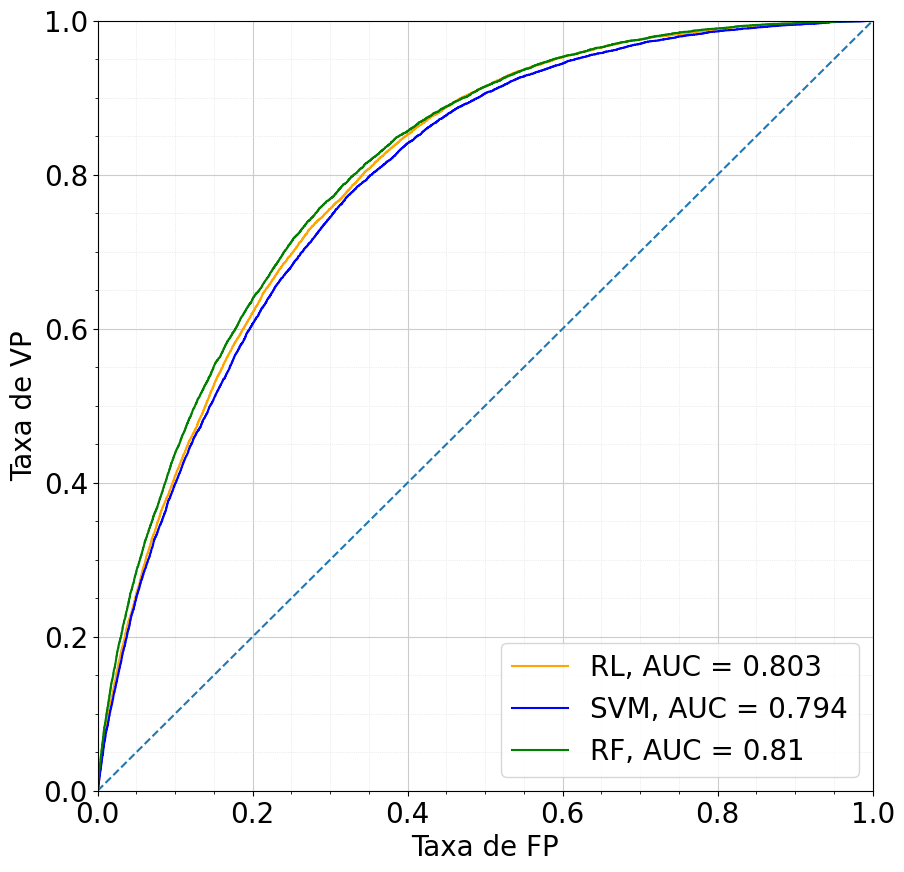

In [42]:
ns_probs = [0 for _ in range(len(y_test))]

svm_probs = svm_classifier_final.decision_function(X_test)
rf_probs = rf_classifier_final.predict_proba(X_test)
rf_probs = rf_probs[:, 1]


lr_probs = lr_classifier_final.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.plot(ns_fpr, ns_tpr, linestyle='--')
ax.plot(lr_fpr, lr_tpr, color="orange", label=f'RL, AUC = {round(lr_auc, 3)}')
ax.plot(svm_fpr, svm_tpr, color="blue", label=f'SVM, AUC = {round(svm_auc ,3)}')
ax.plot(rf_fpr, rf_tpr, color="green", label=f'RF, AUC = {round(rf_auc ,3)}')

# # axis labels
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_xlabel('Taxa de FP')
ax.set_ylabel('Taxa de VP')
ax.grid(which='major', color='#CCCCCC', linewidth=0.8)
ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.legend()
plt.savefig("../results/roc_curve_balanced.png")
plt.show()